In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"sashankvasireddy","key":"2253b2d1fabe4ceabf289da585a77cbf"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c feedback-prize-english-language-learning

feedback-prize-english-language-learning.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/feedback-prize-english-language-learning.zip

Archive:  /content/feedback-prize-english-language-learning.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train.shape,test.shape

((3911, 8), (3, 2))

In [ ]:
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [ ]:
train.isnull().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

In [ ]:
train['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [ ]:
train.select_dtypes(['int','float']).describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
import re 

In [ ]:
train['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [ ]:
train['full_text']=train['full_text'].replace(re.compile('\n\r\t'),' ',regex=True)
test['full_text']=test['full_text'].replace(re.compile('\n\r\t'),' ',regex=True)

In [ ]:
train['full_text'].str.split()

0       [I, think, that, students, would, benefit, fro...
1       [When, a, problem, is, a, change, you, have, t...
2       [Dear,, Principal, If, u, change, the, school,...
3       [The, best, time, in, life, is, when, you, bec...
4       [Small, act, of, kindness, can, impact, in, ot...
                              ...                        
3906    [I, believe, using, cellphones, in, class, for...
3907    [Working, alone,, students, do, not, have, to,...
3908    ["A, problem, is, a, chance, for, you, to, do,...
3909    [Many, people, disagree, with, Albert, Schweit...
3910    [Do, you, think, that, failure, is, the, main,...
Name: full_text, Length: 3911, dtype: object

In [ ]:
from collections import Counter 
corpus=' '.join(train['full_text'])
d=Counter(corpus.split())
word_count=pd.DataFrame({'words':list(d.keys()),'count':list(d.values())})
word_count['word_len']=word_count['words'].apply(lambda x:len(x))
word_count

,words,count,word_len
0,I,17885,1
1,think,5948,5
2,that,28573,4
3,students,10838,8
4,would,6682,5
...,...,...,...
41960,1/4th,1,5
41961,Schweitzer's,1,12
41962,matter!,1,7
41963,tragedy,1,7


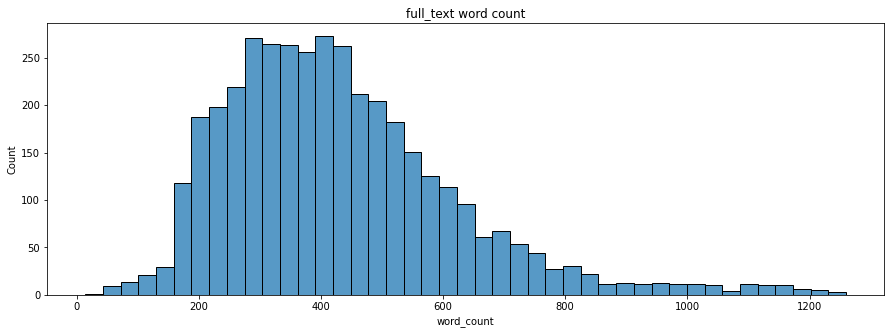

In [ ]:
fig = plt.figure(figsize=(15, 5))
train['word_count'] = train.full_text.apply(lambda x: len(x.split()))
sns.histplot(data=train, x="word_count")
plt.title("full_text word count")
plt.show()

In [ ]:
avg_word_count=round(train['word_count'].mean())

In [ ]:
avg_word_count

430

In [ ]:
train['word_count'].median()

402.0

In [ ]:
max_words=round(train['word_count'].max())
max_words

1260

In [ ]:
from wordcloud import WordCloud

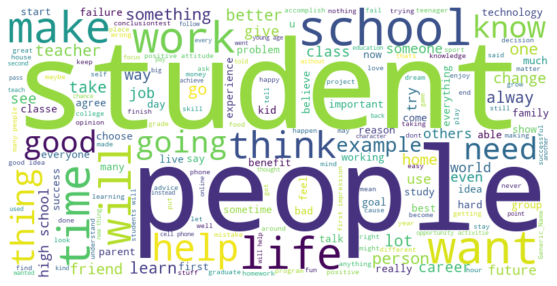

In [ ]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(train.full_text))
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words_counting = word_count.sort_values(by = 'word_len', ascending = False)

In [ ]:
words_counting['words'].head()

10314    ride,rock-climb,roller-skating,surfing,camping...
8736     opinions,strategies,problems,situation,stateme...
37619    binders,books,folders,crayons,pencils,pens,pap...
24046    Generic_Name,Generic_Name,Generic_Name,Generic...
39263    assignments,homework,projects,PowerPoints,test...
Name: words, dtype: object

In [ ]:
print('Amount of Generic Sequences: ',word_count[word_count.words.str.contains('Generic')]['count'].sum())

Amount of Generic Sequences:  1770


In [ ]:
num_cols=list(train.select_dtypes(['int','float']).columns)

In [ ]:
num_cols

['cohesion',
 'syntax',
 'vocabulary',
 'phraseology',
 'grammar',
 'conventions',
 'word_count']

In [ ]:
enumerate(num_cols)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

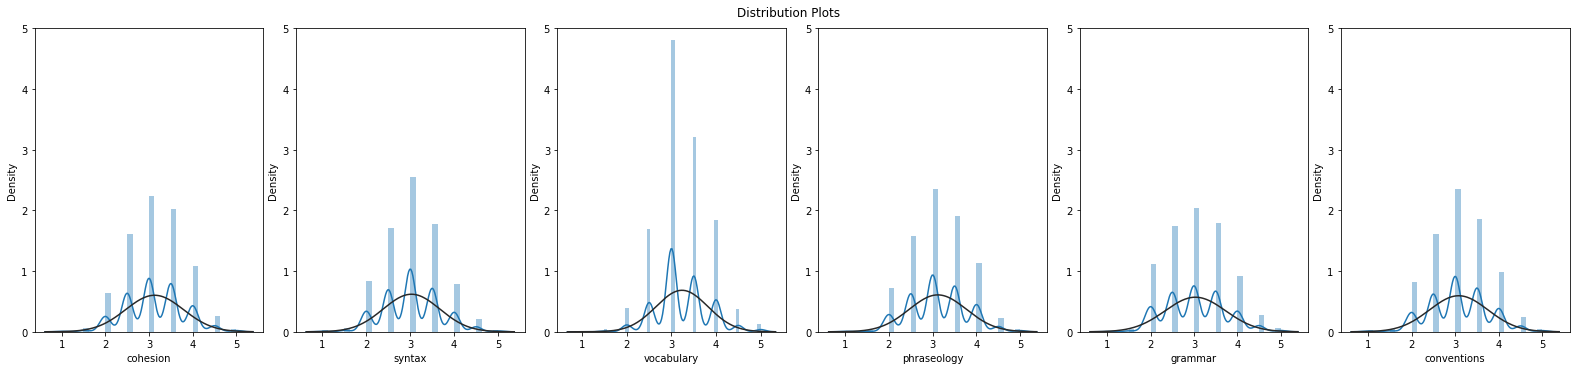

In [ ]:
from scipy import stats

figure = plt.figure(figsize = (22,5))
for i, col in enumerate(train.select_dtypes(['int','float']).columns[:6]): 
    ax = plt.subplot(1, 6, i+1)
    if train[col].dtype == 'int': 
        sns.distplot(train[col], fit=stats.norm, color = 'red')        
    else: 
        sns.distplot(train[col], fit=stats.norm)        
    ax.set_ylim((0.0, 5.0))
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Distribution Plots', y=1.02)
plt.show()


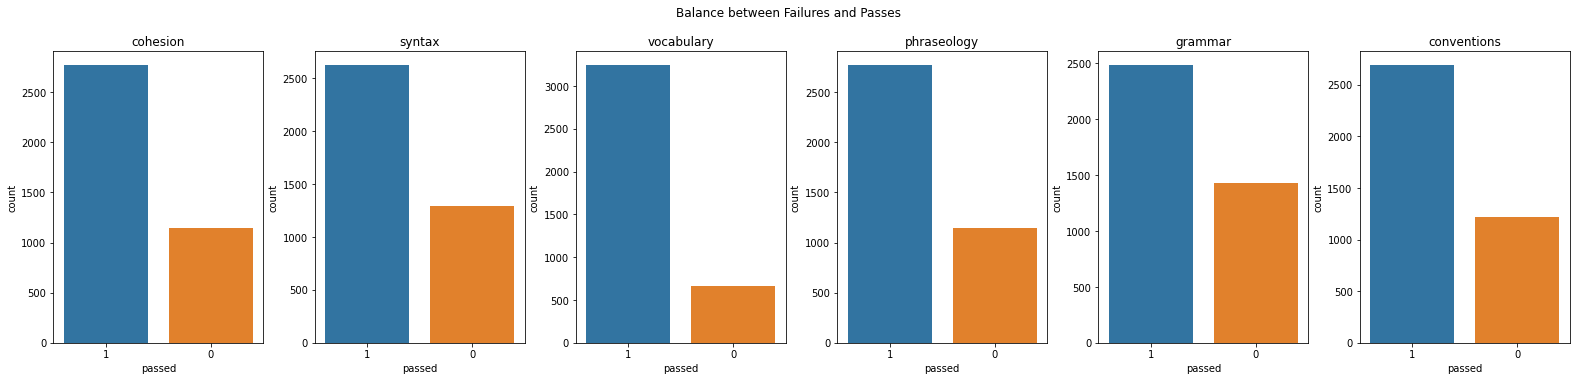

In [ ]:
figure = plt.figure(figsize = (22,5))
for i, col in enumerate(train.select_dtypes(['int','float']).columns[:6]):
    ax = plt.subplot(1, 6, i+1)
    conditionlist = [(train[col] >= 3), (train[col] < 3)]
    choicelist = [1,0]
    train['passed'] = np.select(conditionlist, choicelist, default='Not Specified')    
    sns.countplot(x=train.passed, label = ['Failures','Passes'])
    del train['passed']
    ax.set_title(col)
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Balance between Failures and Passes', y=1.05)
plt.show()

In [ ]:
train['sentence_score']=train['cohesion']+train['syntax']+train['vocabulary']+train['phraseology']+train['grammar']+train['conventions']

In [ ]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count,sentence_score
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,20.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,14.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,18.0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,27.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,16.5
...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,17.0
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,22.5
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,18.0
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,26.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average no of punctuations')

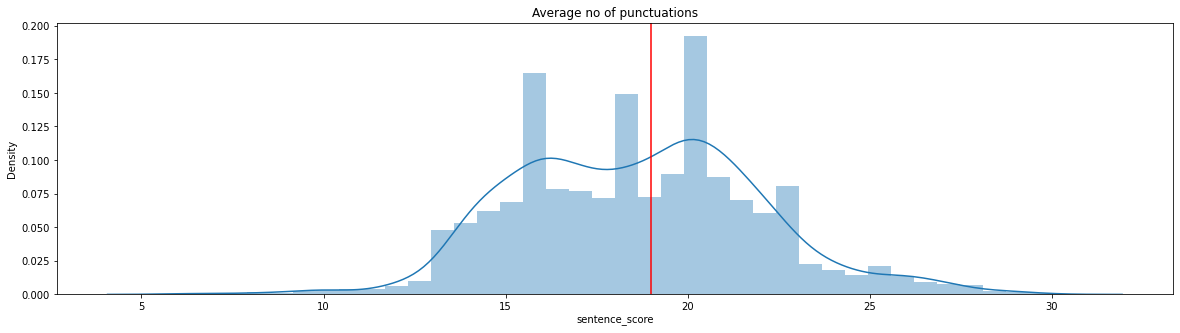

In [ ]:
#average no of punctuations
average_char= round(train['sentence_score'].mean())
average_char
plt.figure(figsize=(20,5))
sns.distplot(train['sentence_score'])
plt.axvline(x = average_char, color = 'red')
plt.title('Average no of punctuations')

In [ ]:
#charecter count
train['char_len']=train['full_text'].str.len()
train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count,sentence_score,char_len
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,20.0,1387
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,14.5,2635
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,18.0,1663
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,27.0,3973
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,16.5,1326


In [ ]:
avg_char_len=round(train['char_len'].mean())
avg_char_len

2335

Text(0.5, 1.0, 'Character Count')

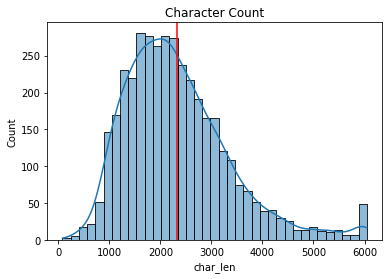

In [ ]:
sns.histplot(train['char_len'],kde=True)
plt.axvline(x = avg_char_len, color = 'red')
plt.title('Character Count')

Text(0.5, 1.0, 'Word Count')

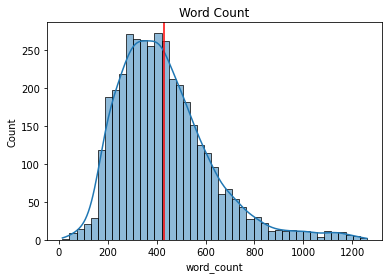

In [ ]:
sns.histplot(train['word_count'],kde=True)
plt.axvline(x = avg_word_count, color = 'red')
plt.title('Word Count')

In [ ]:
num_cols= train.select_dtypes(include=['float']).columns.tolist()
num_cols.remove('sentence_score')
num_cols

['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [ ]:
for col in num_cols:
  mid=train[col].mean()
  max=train[col].max()
  min=train[col].min()
  print(mid)
  print(max)
  print(min)

3.127077473791869
5.0
1.0
3.0282536435694194
5.0
1.0
3.2357453336742523
5.0
1.0
3.1168499105088214
5.0
1.0
3.032856047046791
5.0
1.0
3.081053439018154
5.0
1.0


In [ ]:
def plot_dist_scores(x):
  for i, col in enumerate(num_cols):
    figure, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (22,5))
    cond_list=[(train[col]>=4.5),(train[col]>=2)&(train[col]<4.5),(train[col]<2)]
    choicelist = ['High', 'Mid', 'Low']
    train['perf'] = np.select(cond_list, choicelist)
    mask = train.perf!= 'Mid'
    sns.kdeplot(train[mask][x], hue = train.perf, ax = axes[i])
    axes[i].set_title(col)
    low_mask= train.perf == 'Low'
    low_avg = train[low_mask][x].mean()
    axes[i].axvline(x = low_avg, color = 'green', linestyle = '--')
    high_mask= train.perf == 'High'
    high_avg = train[high_mask][x].mean()
    axes[i].axvline(x = high_avg, color = 'orange', linestyle = '--')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize

train['sent_count'] = train['full_text'].apply(lambda x: len(sent_tokenize(x)))
avg_sent = round(train['sent_count'].mean())
print('Average Count: {}'.format(avg_sent))

train['avg_sent_len'] = train['full_text'].apply(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))
avg_sent_len = round(np.mean(train['avg_sent_len']))
print('Average Sentence Length: {}'.format(avg_sent_len))

Average Count: 18
Average Sentence Length: 30


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


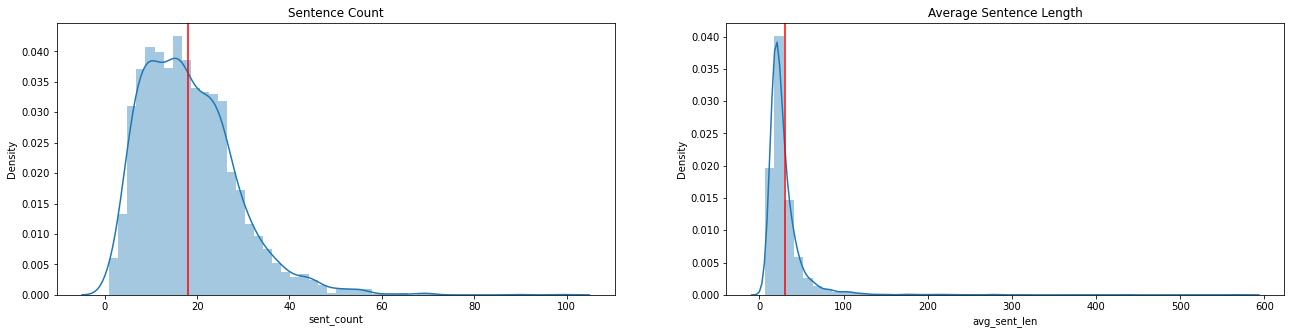

In [ ]:
plt.figure(figsize = (22,5))
for i, col in enumerate(['sent_count','avg_sent_len']):
        title = 'Sentence Count' if i == 0 else 'Average Sentence Length'
        mean = avg_sent if i == 0 else avg_sent_len 
        ax = plt.subplot(1, 2, i+1)
        sns.distplot(train[col])
        ax.axvline(x = mean, color = 'red')
        ax.set_title(title)

In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords=set(stopwords.words('english'))
print("List of english stopwords -")
print(eng_stopwords)

List of english stopwords -
{'the', 'an', 'how', 'what', 'did', 'both', 'herself', 'if', 'm', 'all', "it's", 'themselves', 'those', 'is', 'shan', 've', 'mustn', 'this', 'ours', 'about', 'o', 'at', 'his', 'we', 'been', 'during', 'him', 'ain', 'but', 'should', 'nor', "should've", 'haven', 'these', 'up', 'yourself', 'again', 'between', 'that', 'being', 'then', 'she', 'now', 'here', 'each', 'under', 'couldn', 'below', 'didn', 'y', 'needn', 'they', 'has', 'other', 'where', 'after', 's', 'it', 'were', 'of', 'doesn', 'above', 'me', 'her', 'can', 'mightn', 'who', "you're", 'more', 'their', 'ourselves', "wouldn't", 'any', 'few', 'don', 'such', 'so', 'most', 'to', 'for', 'wouldn', 'not', 'on', "haven't", 'down', "couldn't", 'be', 'you', 'hasn', "you'd", 'are', 'in', 're', 'against', 'yours', 'aren', "aren't", 'once', 'myself', 'your', "you've", "didn't", 'hers', "mightn't", 'theirs', 'when', 'or', 'over', "doesn't", 'shouldn', 'its', 'have', 'just', "needn't", 'do', 'ma', 'into', 'i', 'wasn', 's

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

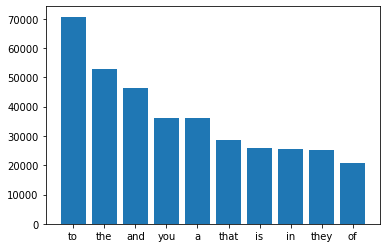

In [ ]:

import operator
from collections import defaultdict

corpus = ''.join(train.full_text).split()
dic = defaultdict(int)

for w in corpus: 
    if w in eng_stopwords: 
        dic[w] += 1
        
dic_sorted = sorted(dic.items(), key = operator.itemgetter(1), reverse = True)
x, y = zip(*dic_sorted[:10])
plt.bar(x,y)

In [ ]:
import string

def clean_text(text):
    # Convert text to lowercase
    txt = text.lower()
    # Remove punctuation
    txt = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # Remove non-Roman characters
    txt = re.sub("([^\x00-\x7F])+", " ", text)    
    return txt

train_copy = train.copy()
train_copy['full_text'] = train_copy['full_text'].map(lambda x: clean_text(x))

In [ ]:
train_copy['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def most_freq_ngrams(s1 = 2, s2 = 2):
    '''Return most frequent N-Grams for a size given.'''
    
    # Initialize CountVectorizer
    vec = CountVectorizer(stop_words = eng_stopwords, ngram_range = (s1, s2))

    # Matrix of ngrams
    bow = vec.fit_transform(train_copy["full_text"])

    # Count frequency of ngrams
    count_values = bow.toarray().sum(axis=0)

    # Create DataFrame from ngram frequencies
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]
    
    return ngram_freq

In [ ]:
from collections import Counter

def get_tokens(tags, tag_type = 'ADJ'): 
    '''Returns all the tokens that are tagged as "tag" in tags. '''
    
    t = [word for word, pos in tags if ((pos == tag_type) & ( word not in eng_stopwords))]
    return t

def show_most_common_tokens(tags, tag_type = 'ADJ', row = -1, col = -1): 
    '''Calculate the most commont tokens tagged as "tag_type" in tags. 
       Shows a Bar Plot with the results. '''
    
    adj_tags = get_tokens(tags, tag_type)
    
    # Count most common adjectives
    most_common = Counter(adj_tags).most_common(10)

    # Visualize most common tags as bar plots
    words, frequency = [], []
    for word, count in most_common:
        words.append(word)
        frequency.append(count)

    if col == -1: sns.barplot(x = frequency, y = words)
    else: sns.barplot(x = frequency, y = words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


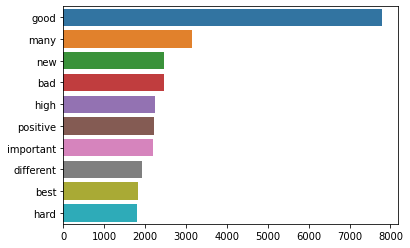

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

corpus_without_stop = [w for w in corpus if w not in eng_stopwords]
tags = nltk.pos_tag(corpus_without_stop, tagset = "universal")

show_most_common_tokens(tags, 'ADJ')

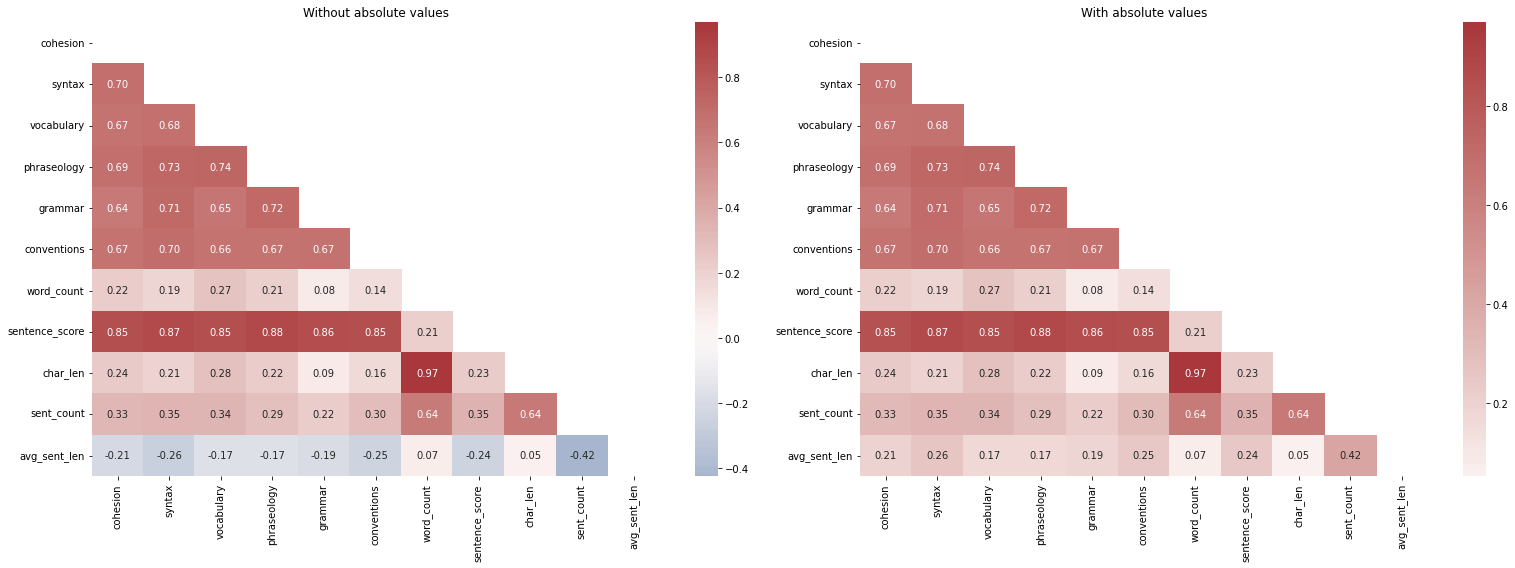

In [ ]:
corr= train.select_dtypes(['int','float']).corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (22,8))
# Heatmap without absolute values
sns.heatmap(corr, mask=matrix, center = 0, cmap = 'vlag', ax = axes[0], 
            annot=True, fmt='.2f').set_title('Without absolute values')
# Heatmap with absolute values
sns.heatmap(abs(corr), mask=matrix, center = 0, cmap = 'vlag', ax = axes[1], 
           annot=True, fmt='.2f').set_title('With absolute values')

fig.tight_layout(h_pad=1.0, w_pad=0.5)

In [ ]:
# Importing Lemmatizer library from nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def most_common_lemmas(corpus): 
    '''Returns a dictionary with lemmas, sorted by frequency.'''
    
    dic = defaultdict(int)
    for w in corpus:
        lemma = lemmatizer.lemmatize(w)
        dic[lemma] += 1

    dic_sorted = sorted(dic.items(), key = operator.itemgetter(1), reverse = True)
    return dic_sorted

[nltk_data] Downloading package wordnet to /root/nltk_data...


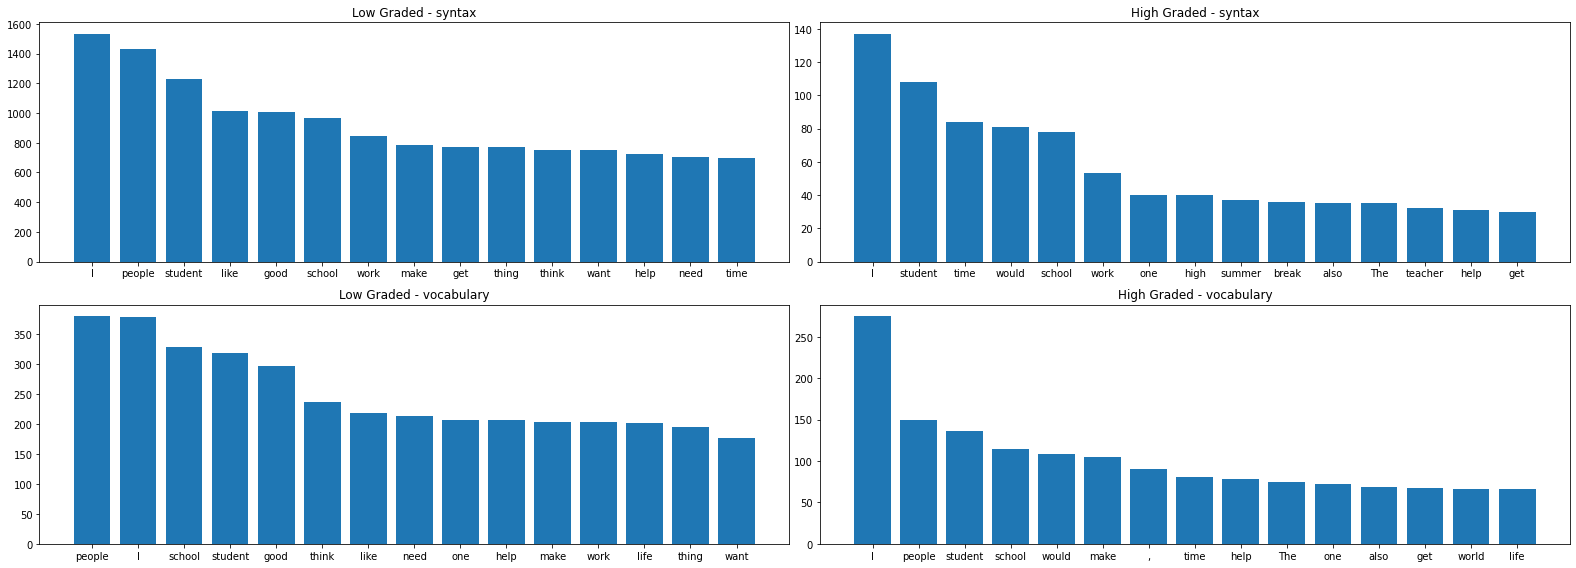

In [ ]:
nltk.download('wordnet')
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,8))
for i, col in enumerate(['syntax','vocabulary']):    
    for j in range(2):
        t = 'Low' if j == 0 else 'High'
        title = '{} Graded - {}'.format(t, col)
        mask = train_copy[col] <= 2 if j == 0 else train_copy[col] == 5

        corpus = ''.join(train_copy[mask].full_text).split()
        corpus_without_stop = [w for w in corpus if w not in eng_stopwords]
        dic_sorted = most_common_lemmas(corpus_without_stop)
        x, y = zip(*dic_sorted[:15])
        axes[i, j].bar(x,y)
        axes[i, j].set_title(title)

figure.tight_layout(h_pad=1.0, w_pad=0.5)


In [ ]:
train

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count,sentence_score,char_len,sent_count,avg_sent_len
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,20.0,1387,18,14.500000
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,14.5,2635,14,38.071429
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,18.0,1663,19,16.842105
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,27.0,3973,36,20.222222
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,16.5,1326,3,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,17.0,977,6,29.833333
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,22.5,2603,16,29.062500
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,18.0,1298,8,32.125000
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,510,26.0,2833,21,24.285714


In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.preprocessing.text.Tokenizer

keras.preprocessing.text.Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train['full_text'])
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train['full_text'])
pad_train = pad_sequences(train_seq, maxlen=max_words, truncating='post')

test_seq = tokenizer.texts_to_sequences(test['full_text'])
pad_test = pad_sequences(test_seq, maxlen=max_words, truncating='post')



In [ ]:
word_idx_count = len(word_index)
print(word_idx_count)

22170


In [ ]:
X = pad_train
y = [train['cohesion'].values, train['syntax'].values, train['vocabulary'].values,
      train['phraseology'].values, train['grammar'].values, train['conventions'].values]

In [ ]:
def get_lstm_model():

    inputs = tf.keras.layers.Input(shape=(max_words))
    embeddings = tf.keras.layers.Embedding(word_idx_count + 1, 64, input_length=max_words)(inputs)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(embeddings)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(x)
    
    output1 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output1 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output1)
    output1 = tf.keras.layers.Dense(1, activation='relu', name='cohesion')(output1)
    
    
    output2 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output2 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output2)
    output2 = tf.keras.layers.Dense(1, activation='relu', name='syntax')(output2)
    
    output3 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output3 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output3)
    output3 = tf.keras.layers.Dense(1, activation='relu', name='vocabulary')(output3)
    
    output4 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output4 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output4)
    output4 = tf.keras.layers.Dense(1, activation='relu', name='phraseology')(output4)
    
    output5 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output5 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output5)
    output5 = tf.keras.layers.Dense(1, activation='relu', name='grammar')(output5)  
    
    output6 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output6 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output6)
    output6 = tf.keras.layers.Dense(1, activation='relu', name='conventions')(output6)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=[output1, output2, output3, output4, output5, output6])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.mean_squared_error
    )
    
    return model

In [ ]:
model = get_lstm_model()

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1260)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1260, 64)     1418944     ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 1260, 128)    66048       ['embedding[0][0]']              
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 1260, 64)    41216       ['bidirectional[0][0]']          
 )                                                                                            

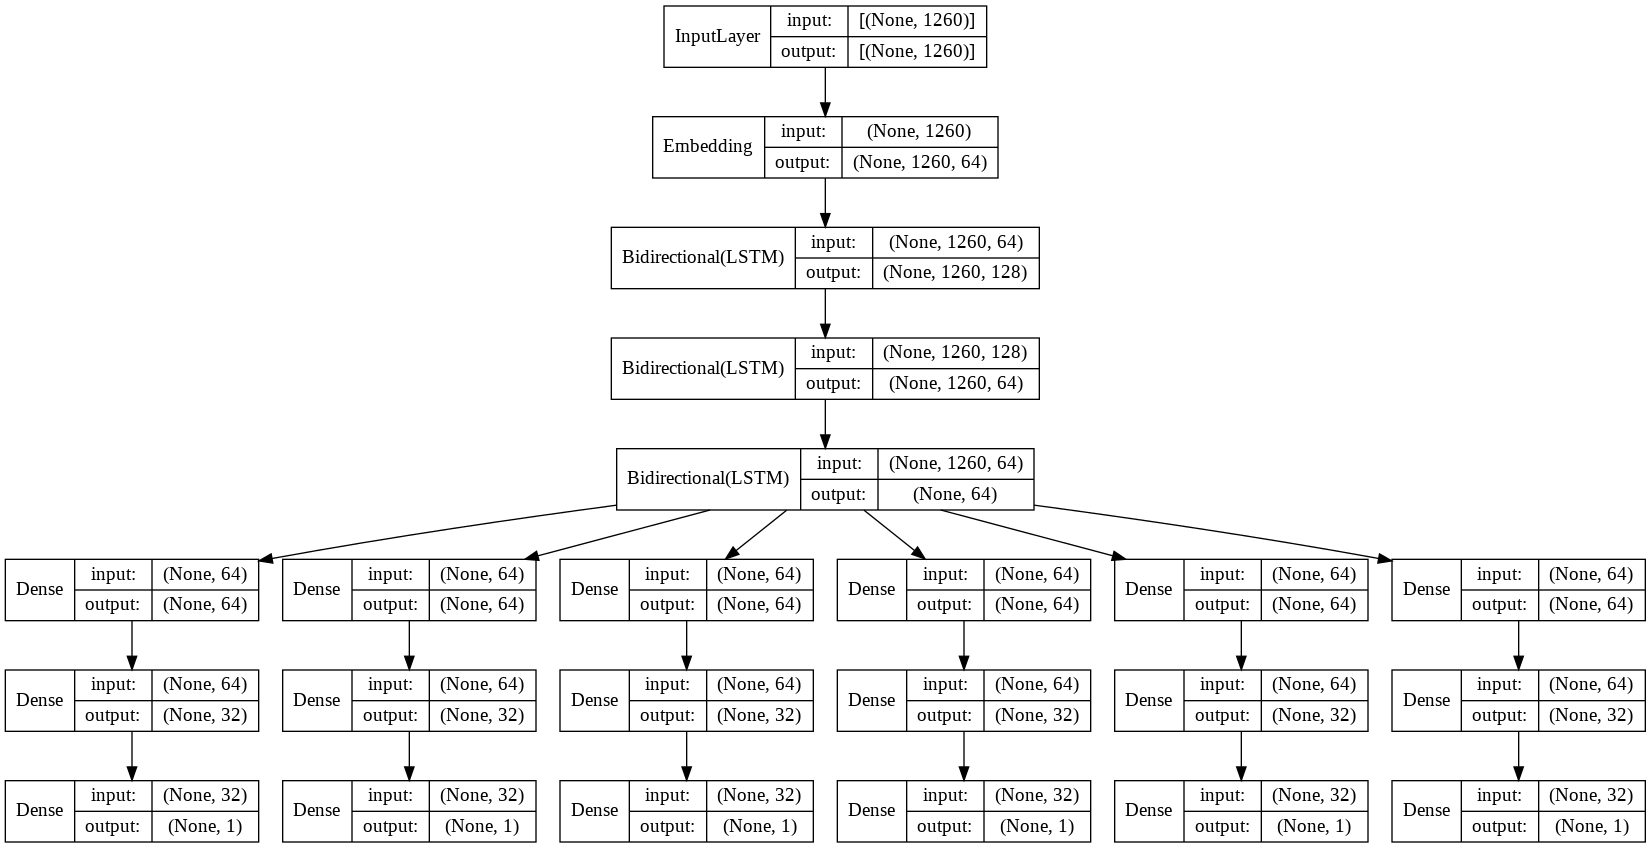

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, to_file="lstmmodel.png")

In [ ]:
history = model.fit(X, y, epochs=30, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/30
98/98 [==============================] - 311s 3s/step - loss: 12.0660 - cohesion_loss: 2.0641 - syntax_loss: 1.8597 - vocabulary_loss: 1.9663 - phraseology_loss: 2.2457 - grammar_loss: 1.9509 - conventions_loss: 1.9584 - val_loss: 2.5733 - val_cohesion_loss: 0.4483 - val_syntax_loss: 0.4352 - val_vocabulary_loss: 0.3299 - val_phraseology_loss: 0.4133 - val_grammar_loss: 0.4982 - val_conventions_loss: 0.4297
Epoch 2/30
98/98 [==============================] - 293s 3s/step - loss: 2.6375 - cohesion_loss: 0.4435 - syntax_loss: 0.4262 - vocabulary_loss: 0.3502 - phraseology_loss: 0.4419 - grammar_loss: 0.4953 - conventions_loss: 0.4624 - val_loss: 2.6206 - val_cohesion_loss: 0.4498 - val_syntax_loss: 0.4201 - val_vocabulary_loss: 0.3428 - val_phraseology_loss: 0.4236 - val_grammar_loss: 0.5297 - val_conventions_loss: 0.4370
Epoch 3/30
98/98 [==============================] - 293s 3s/step - loss: 2.6324 - cohesion_loss: 0.4416 - syntax_loss: 0.4218 - vocabulary_loss: 0.3503 - phr

In [ ]:
X_test = pad_test
results = model.predict(X_test)

1/1 [==============================] - 4s 4s/step


In [ ]:
results

[array([[3.1998599],
        [3.6889303],
        [3.3335123]], dtype=float32), array([[3.0677626],
        [3.7107587],
        [3.0419834]], dtype=float32), array([[3.4920933],
        [3.6298983],
        [3.2720222]], dtype=float32), array([[3.1175945],
        [3.8652437],
        [3.1376886]], dtype=float32), array([[2.9331775],
        [3.9062557],
        [2.846027 ]], dtype=float32), array([[3.10279  ],
        [3.814365 ],
        [3.2084026]], dtype=float32)]